In [1]:
!pip install git+https://github.com/single-cell-genetics/XClone

  Cloning https://github.com/single-cell-genetics/XClone to /tmp/pip-req-build-jny_fnbr
  Running command git clone --filter=blob:none --quiet https://github.com/single-cell-genetics/XClone /tmp/pip-req-build-jny_fnbr
  Resolved https://github.com/single-cell-genetics/XClone to commit 069a67f53b9a069b0ed583b9dfa8129fe67be7d3
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
%load_ext autoreload
%autoreload 2

import xclone
import anndata as an
import pandas as pd
import numpy as np
import scipy
print("scipy", scipy.__version__)

xclone.pp.efficiency_preview()

(Running XClone 0.3.10)
2025-06-26 11:51:53
scipy 1.15.3
[XClone efficiency] multiprocessing cpu total count in your device 12


In [3]:
RDR_file = "tumor5_outputs/tumor5_rdr/matrix.mtx"
mtx_barcodes_file = "tumor5_outputs/tumor5_rdr/barcodes.tsv" # cell barcodes
regions_anno_file = "tumor5_outputs/tumor5_rdr/features.tsv" # feature annnotation
RDR_adata = xclone.pp.xclonedata(RDR_file,
                     'RDR',
                     mtx_barcodes_file,
                     genome_mode = "hg19_genes",
                     data_notes = None)

/home/sc5625/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [5]:
import scanpy as sc

old_adata = sc.read_h5ad("/home/sc5625/xclone_files/adata_t5_backup.h5ad")

In [ ]:
import pandas as pd

old_obs = old_adata.obs.copy()
old_obs["stripped_name"] = old_obs["obs_names"].astype(str).str.replace(r"\d+$", "", regex=True)
old_obs = old_obs.drop_duplicates(subset="stripped_name")
old_obs

Type cell_type           obs_names      stripped_name
0             Tumor         T  AAACATAAAATGTCTGT1  AAACATAAAATGTCTGT
1             Tumor         T  AAACATAATTTCCGTTC1  AAACATAATTTCCGTTC
2     Megakaryocyte         N  AAACATACCTGCAATAT1  AAACATACCTGCAATAT
3             Tumor         T  AAACATAGAACCTCATC1  AAACATAGAACCTCATC
4             Tumor         T  AAACATAGCGTTTGATA1  AAACATAGCGTTTGATA
...             ...       ...                 ...                ...
1897             EC         N  TTTTATTATTCTACAAT1  TTTTATTATTCTACAAT
1898             EC         N  TTTTATTATTCTAGTGT1  TTTTATTATTCTAGTGT
1899          Tumor         T  TTTTATTATTCTATTAA1  TTTTATTATTCTATTAA
1900          Tumor         T  TTTTATTCTTCATGTGG1  TTTTATTCTTCATGTGG
1901             EC         N  TTTTATTGGTGCCAATA1  TTTTATTGGTGCCAATA

[1902 rows x 4 columns]

In [7]:
metadata_df = old_obs.set_index("stripped_name")[["Type", "cell_type"]]
RDR_obs = RDR_adata.obs.copy()
RDR_obs["matched_name"] = RDR_obs.index
RDR_obs = RDR_obs.merge(metadata_df, left_on="matched_name", right_index=True, how="left")
RDR_obs

matched_name           Type cell_type
AAACATAAAATGTCTGT  AAACATAAAATGTCTGT          Tumor         T
AAACATAATTTCCGTTC  AAACATAATTTCCGTTC          Tumor         T
AAACATACCTGCAATAT  AAACATACCTGCAATAT  Megakaryocyte         N
AAACATAGAACCTCATC  AAACATAGAACCTCATC          Tumor         T
AAACATAGCGTTTGATA  AAACATAGCGTTTGATA          Tumor         T
...                              ...            ...       ...
TTTTATTATTCTACAAT  TTTTATTATTCTACAAT             EC         N
TTTTATTATTCTAGTGT  TTTTATTATTCTAGTGT             EC         N
TTTTATTATTCTATTAA  TTTTATTATTCTATTAA          Tumor         T
TTTTATTCTTCATGTGG  TTTTATTCTTCATGTGG          Tumor         T
TTTTATTGGTGCCAATA  TTTTATTGGTGCCAATA             EC         N

[1902 rows x 3 columns]

In [ ]:
RDR_adata.obs = RDR_obs
RDR_adata = RDR_adata[~RDR_adata.obs["Type"].isna()].copy()

In [11]:
AD_file = "tumor5_outputs/tumor5_baf/3_baf_fc/xcltk.AD.mtx"
DP_file = "tumor5_outputs/tumor5_baf/3_baf_fc/xcltk.DP.mtx"
mtx_barcodes_file = "tumor5_outputs/tumor5_rdr/barcodes.tsv" # cell barcodes
# use default gene annotation
BAF_adata = xclone.pp.xclonedata([AD_file, DP_file], 'BAF',
                                 mtx_barcodes_file,
                                 genome_mode = "hg19_genes")

/home/sc5625/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
old_obs = old_adata.obs.copy()
old_obs["stripped_name"] = old_obs["obs_names"].astype(str).str.replace(r"\d+$", "", regex=True)
old_obs = old_obs.drop_duplicates(subset="stripped_name")

metadata_df = old_obs.set_index("stripped_name")[["Type", "cell_type"]]
BAF_obs = BAF_adata.obs.copy()
BAF_obs["matched_name"] = BAF_obs.index  # assume these are already stripped
BAF_obs = BAF_obs.merge(metadata_df, left_on="matched_name", right_index=True, how="left")


In [ ]:
BAF_adata.obs = BAF_obs
BAF_adata = BAF_adata[~BAF_adata.obs["Type"].isna()].copy()


RDR 
Configurations:
HMM_brk                        chr_arm
KNN_neighbors                  10
KNN_npcs                       40
WMA_smooth_key                 chr_arm
WMA_window_size                40
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /home/sc5625/xclone_files/tumor5_outputs/xclone5/rdr5
_plot_suffix                   
_start                         1750938726.9819894
_vector_friendly               True
cell_anno_key                  cell_type
dataset_name                   tumor5
develop_mode                   False
dispersion_celltype            None
exclude_XY                     False
file_format_data               h5ad
file_format_figs               pdf
filter_ref_ave                 0.5
fit_GLM_libratio               False
gene_exp_group                 1
gene_exp_ref_log               True
get_marker_genes               True
guide_chr_anno_key             chr_arm
guide_cnv_rat

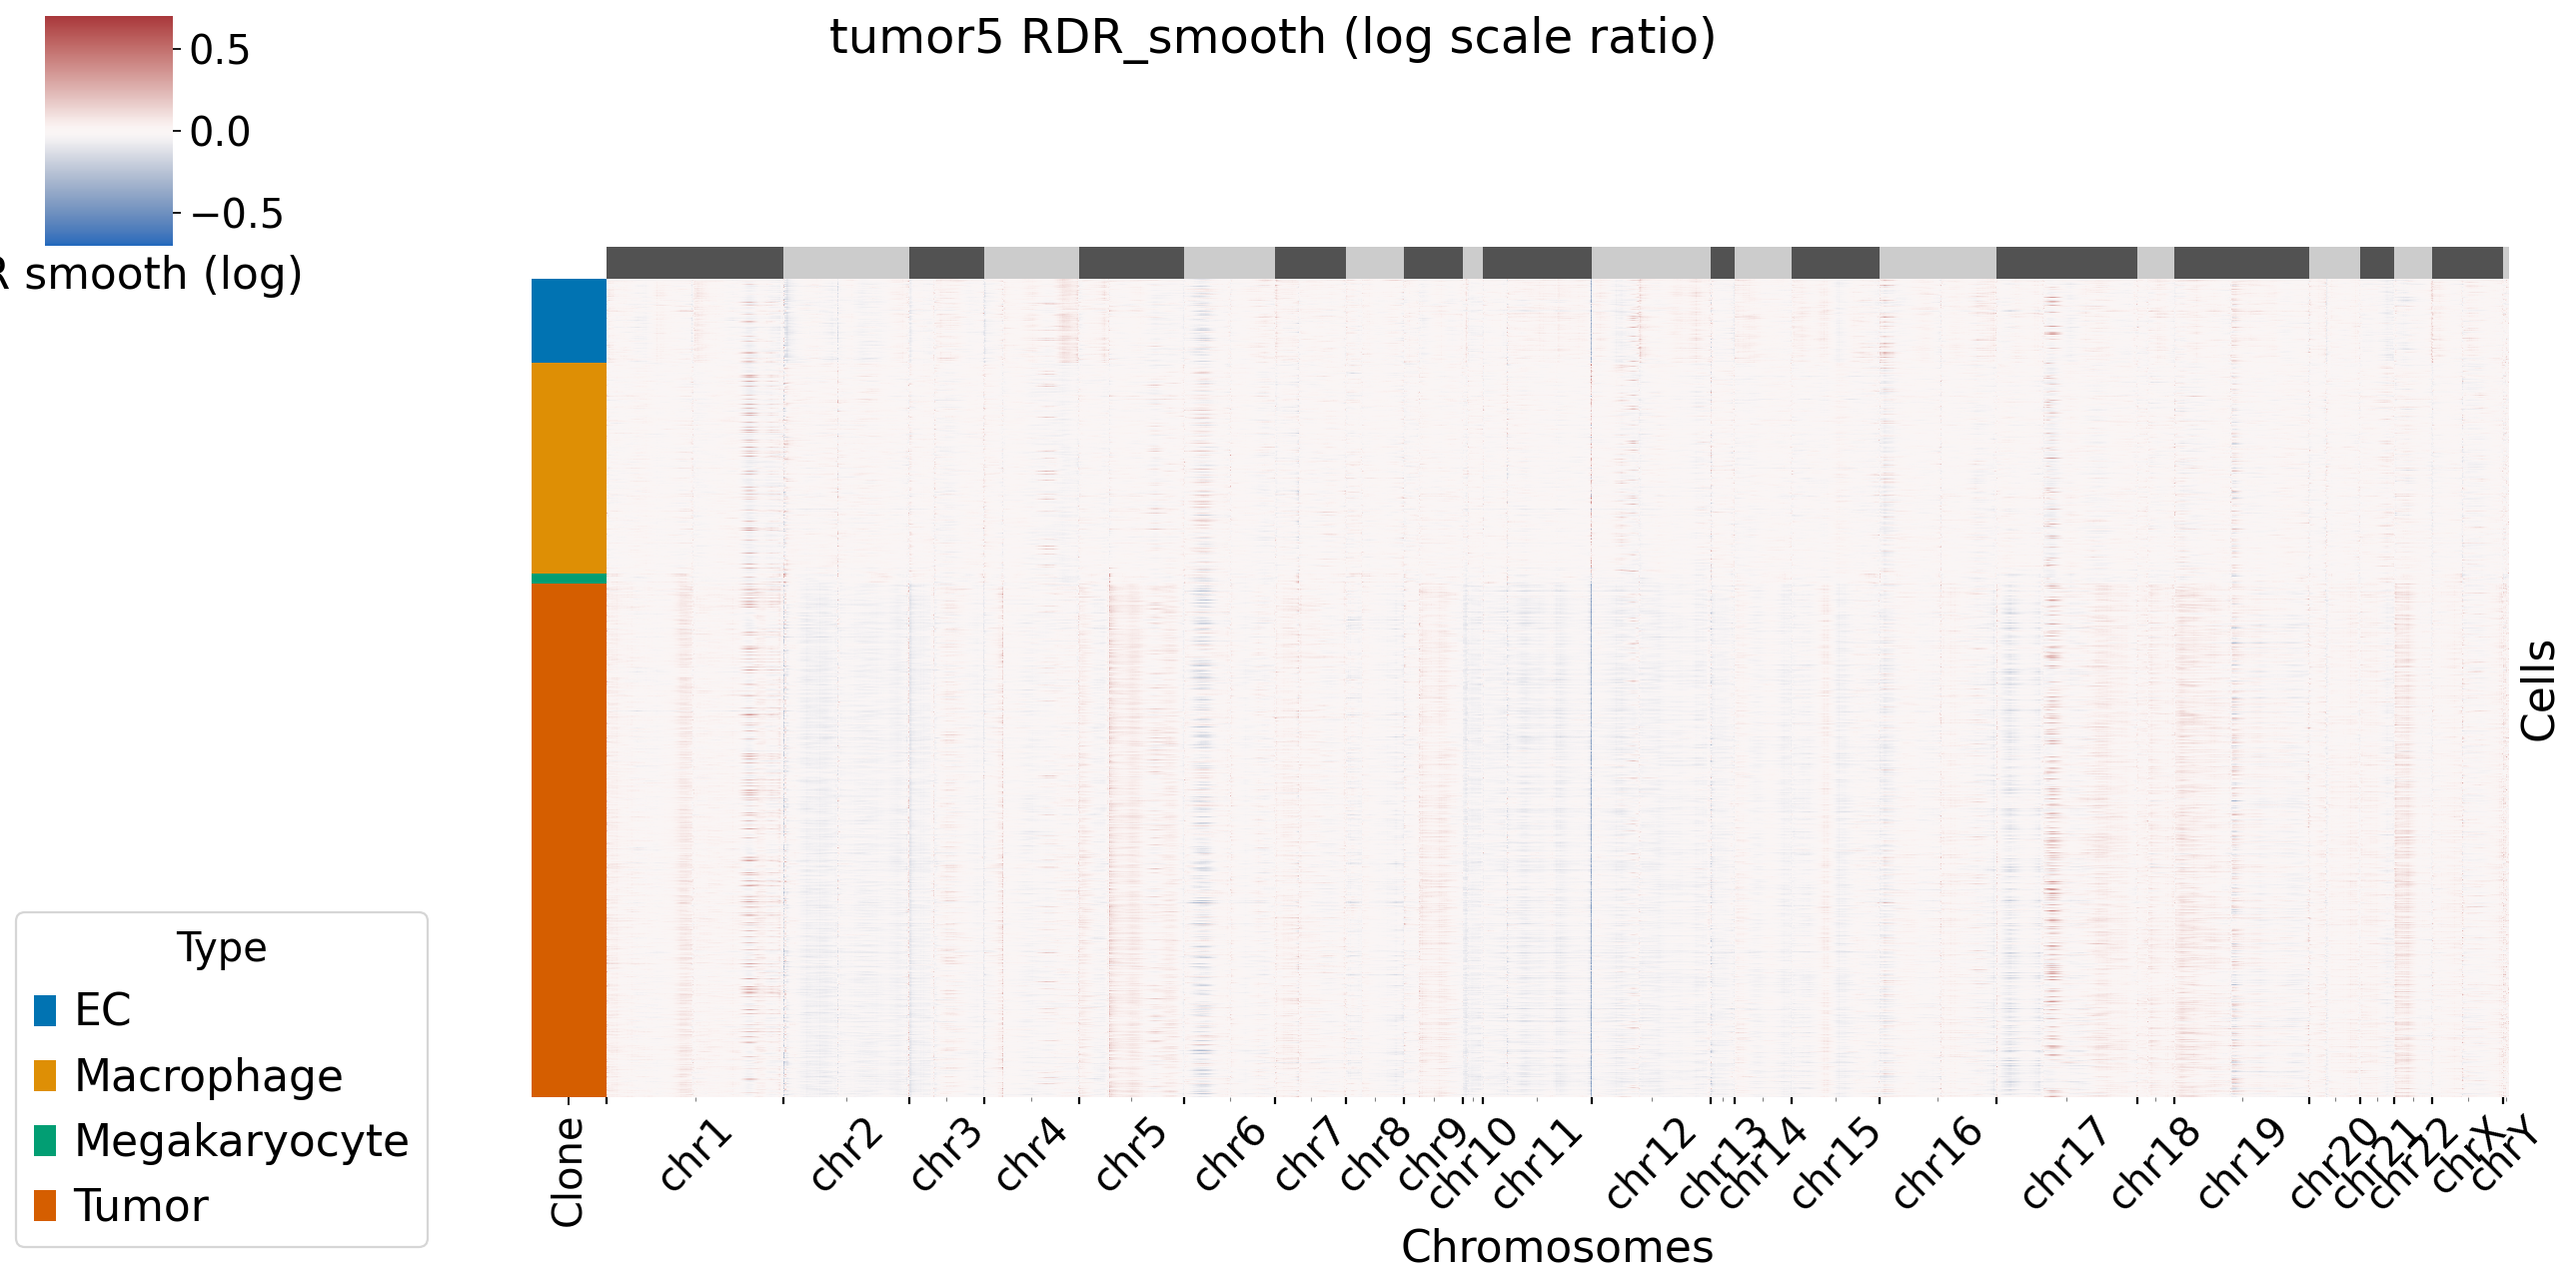

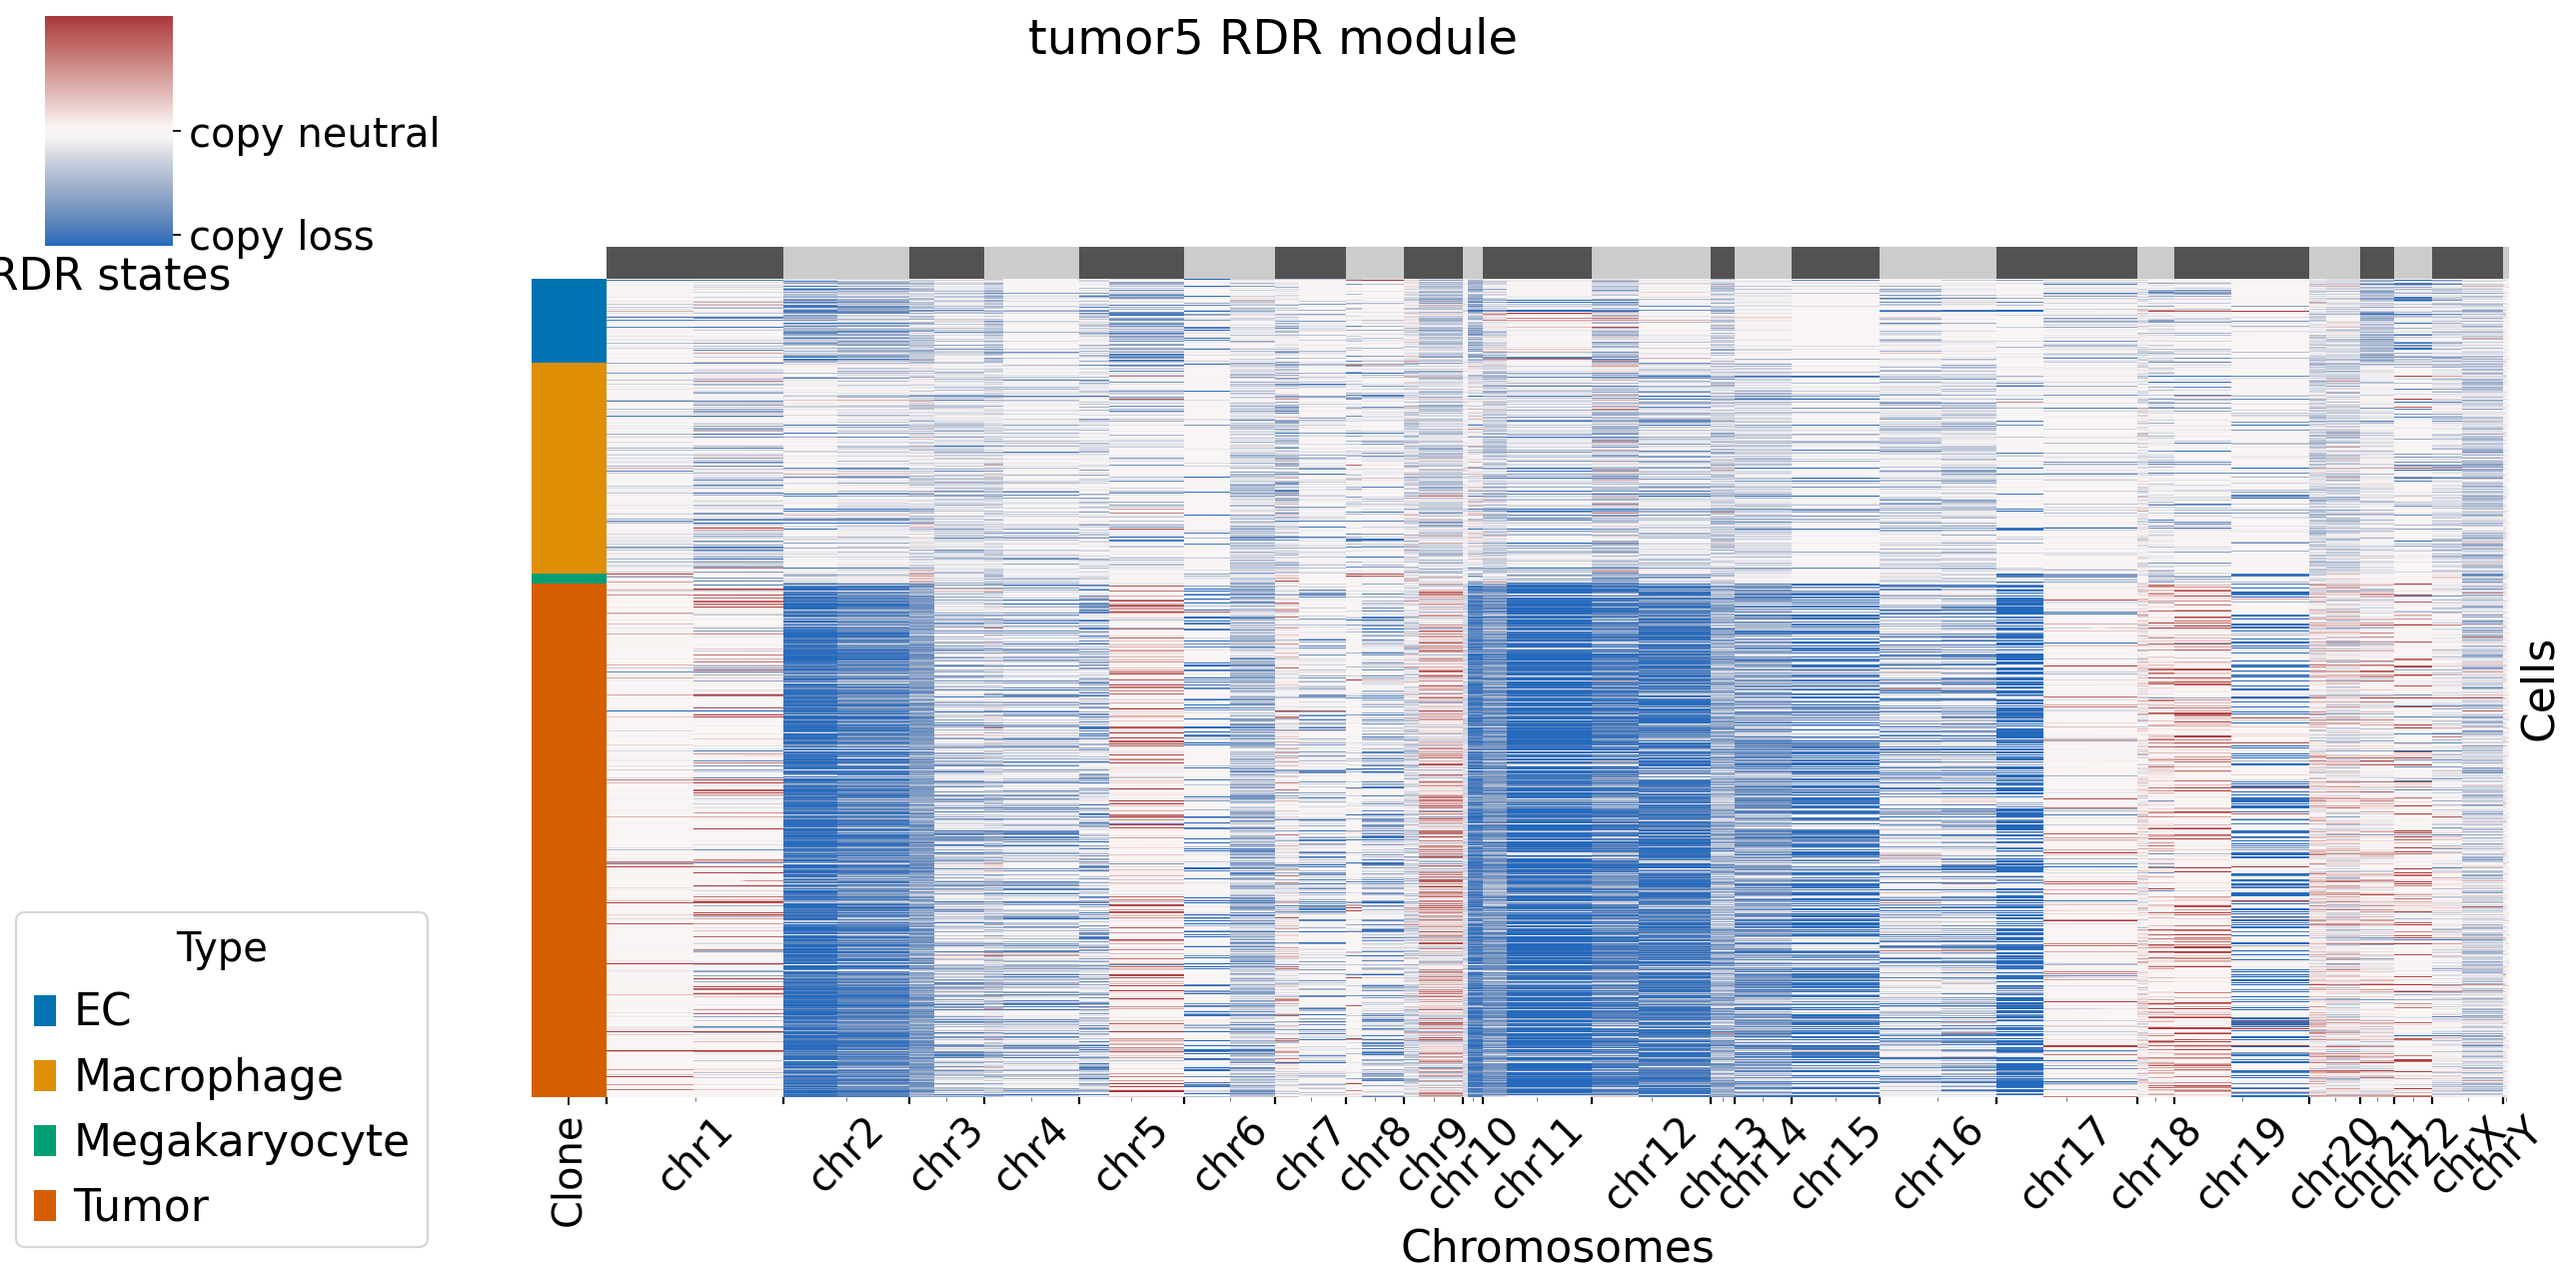

In [16]:
xconfig = xclone.XCloneConfig(dataset_name = "tumor5", module = "RDR", set_smartseq = False)
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = "/home/sc5625/xclone_files/tumor5_outputs/xclone5/rdr5"
xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "N"
xconfig.top_n_marker = 25
xconfig.marker_group_anno_key = "cell_type"
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "Type"
xconfig.trans_t = 1e-6
xconfig.start_prob = np.array([0.3, 0.4, 0.3])


xconfig.display()

RDR_Xdata = xclone.model.run_RDR(RDR_adata,
            config_file = xconfig)

BAF 
Configurations:
BAF_add                        None
BAF_denoise                    True
BAF_denoise_GMM_comp           2
BAF_denoise_GMM_detection      True
BAF_denoise_cellprop_cutoff    0.05
CNV_N_components               5
HMM_brk                        chr_arm
HMM_nproc                      40
KNN_Xlayer                     fill_BAF_phased
KNN_connect_use_key            connectivities_expr
KNN_neighbors                  10
KNN_npcs                       40
RDR_file                       /home/sc5625/xclone_files/tumor5_outputs/xclone5/rdr5/data/RDR_adata_KNN_HMM_post.h5ad
WMA_smooth_key                 chr_arm
WMA_window_size                6
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /home/sc5625/xclone_files/tumor5_outputs/xclone5/baf5
_plot_suffix                   
_start                         1750938996.26027
_vector_friendly               True
baf_bias_mode                  1

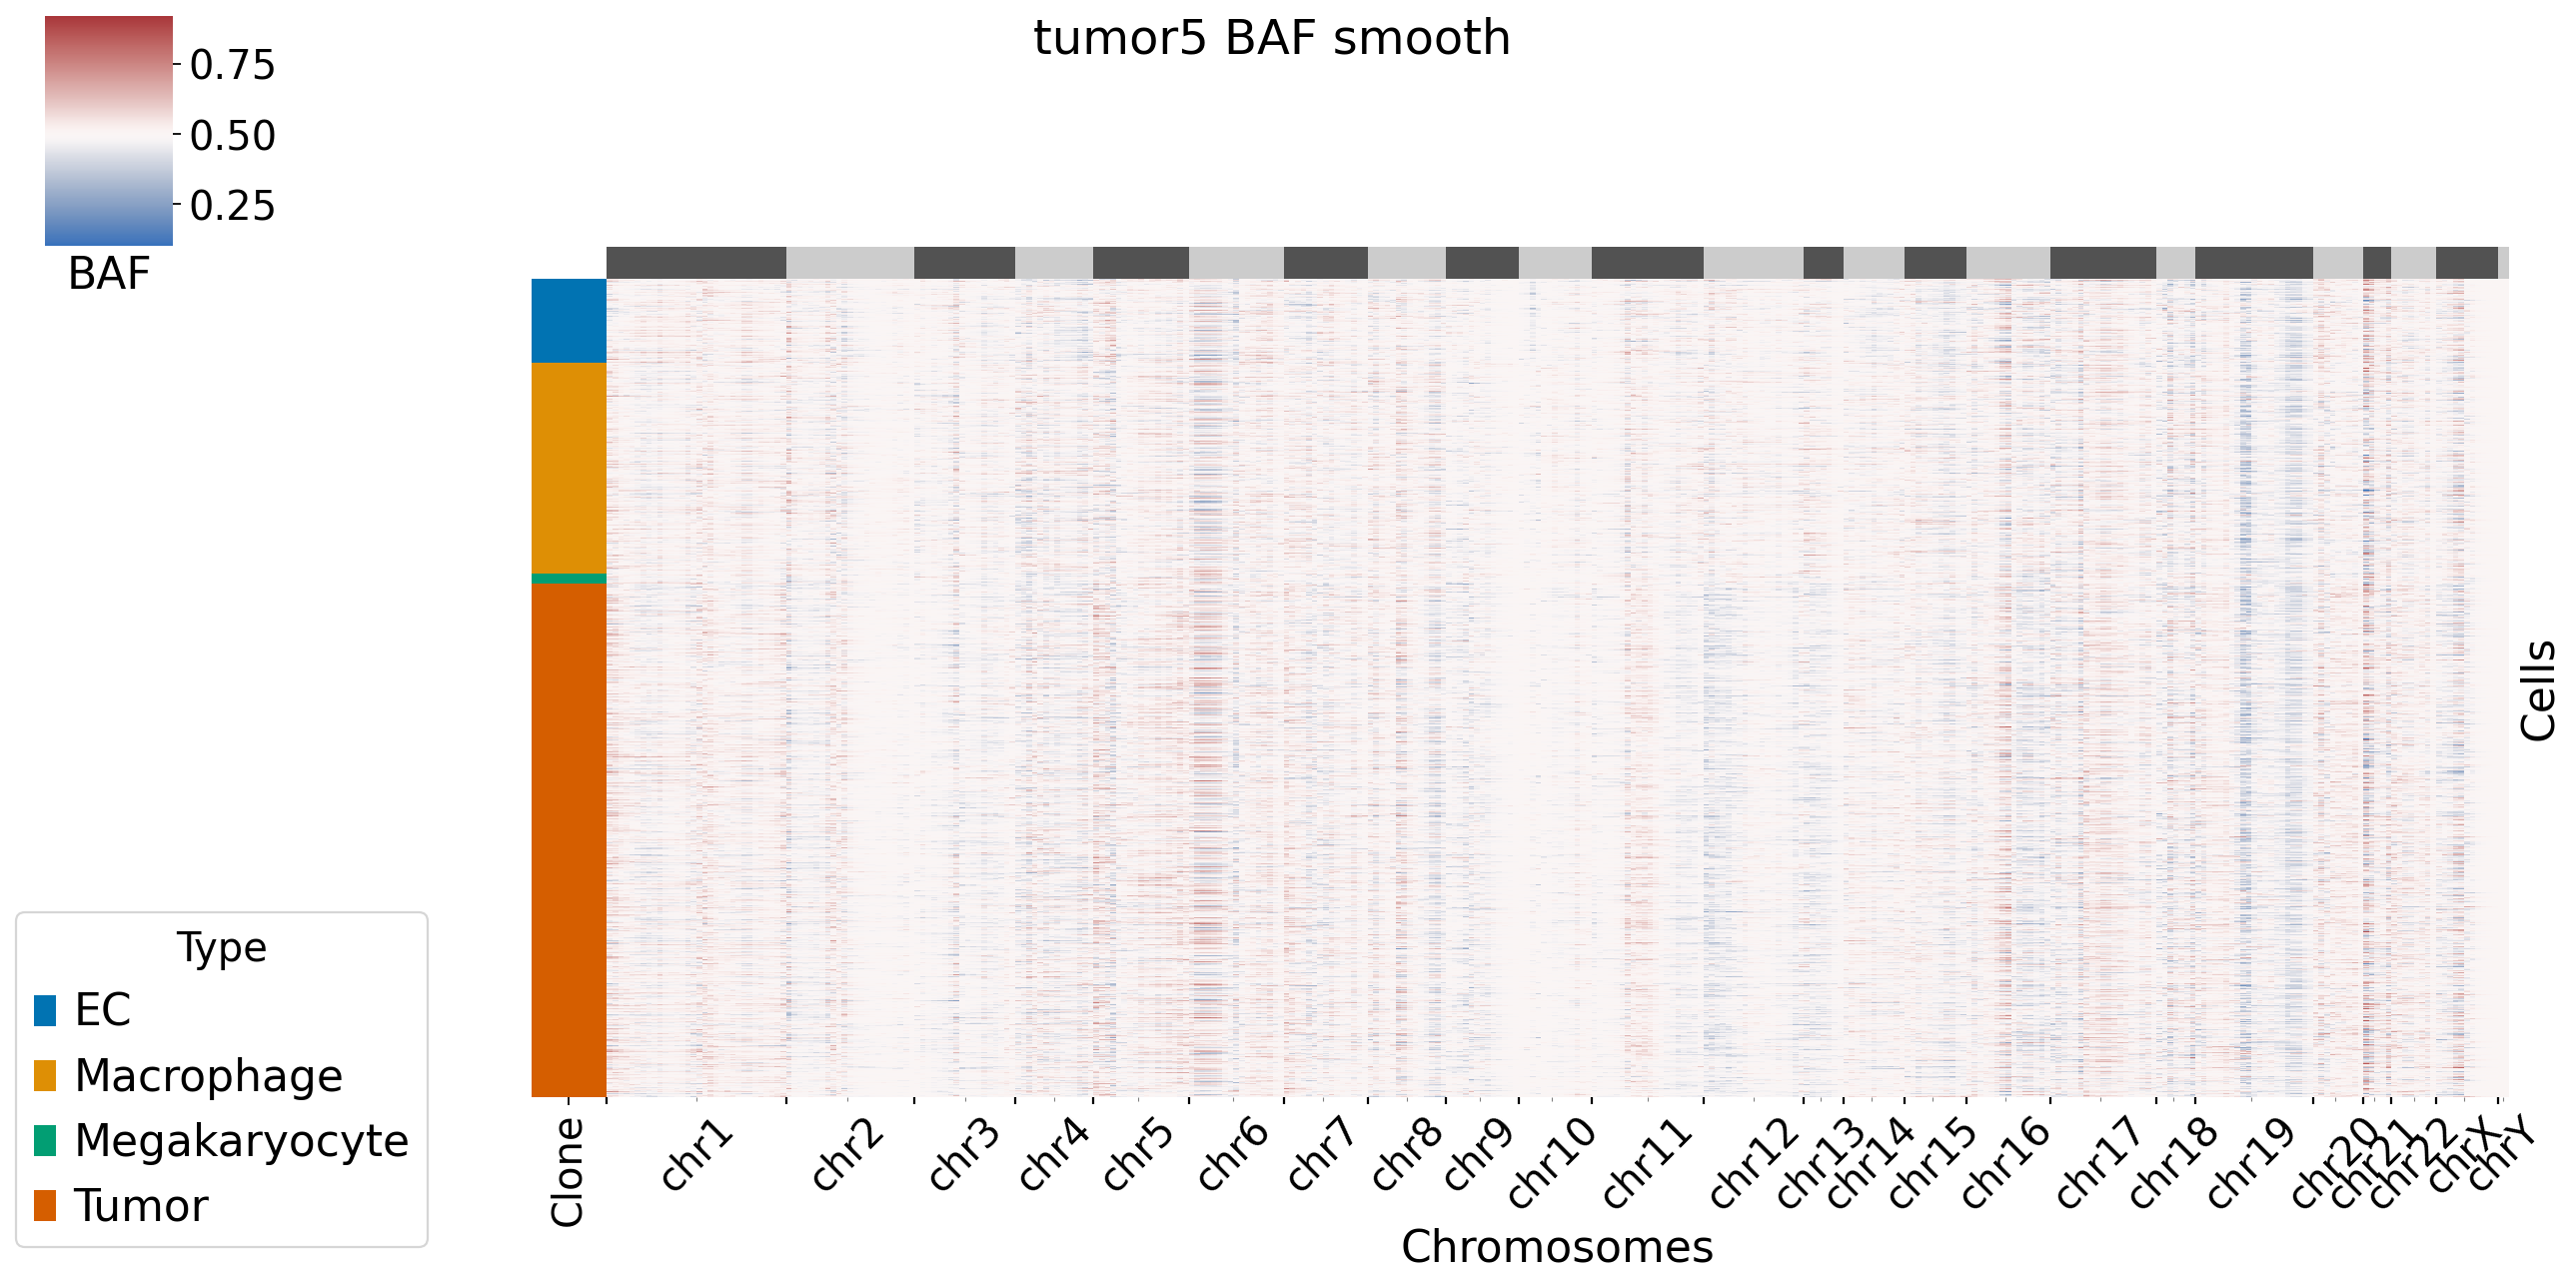

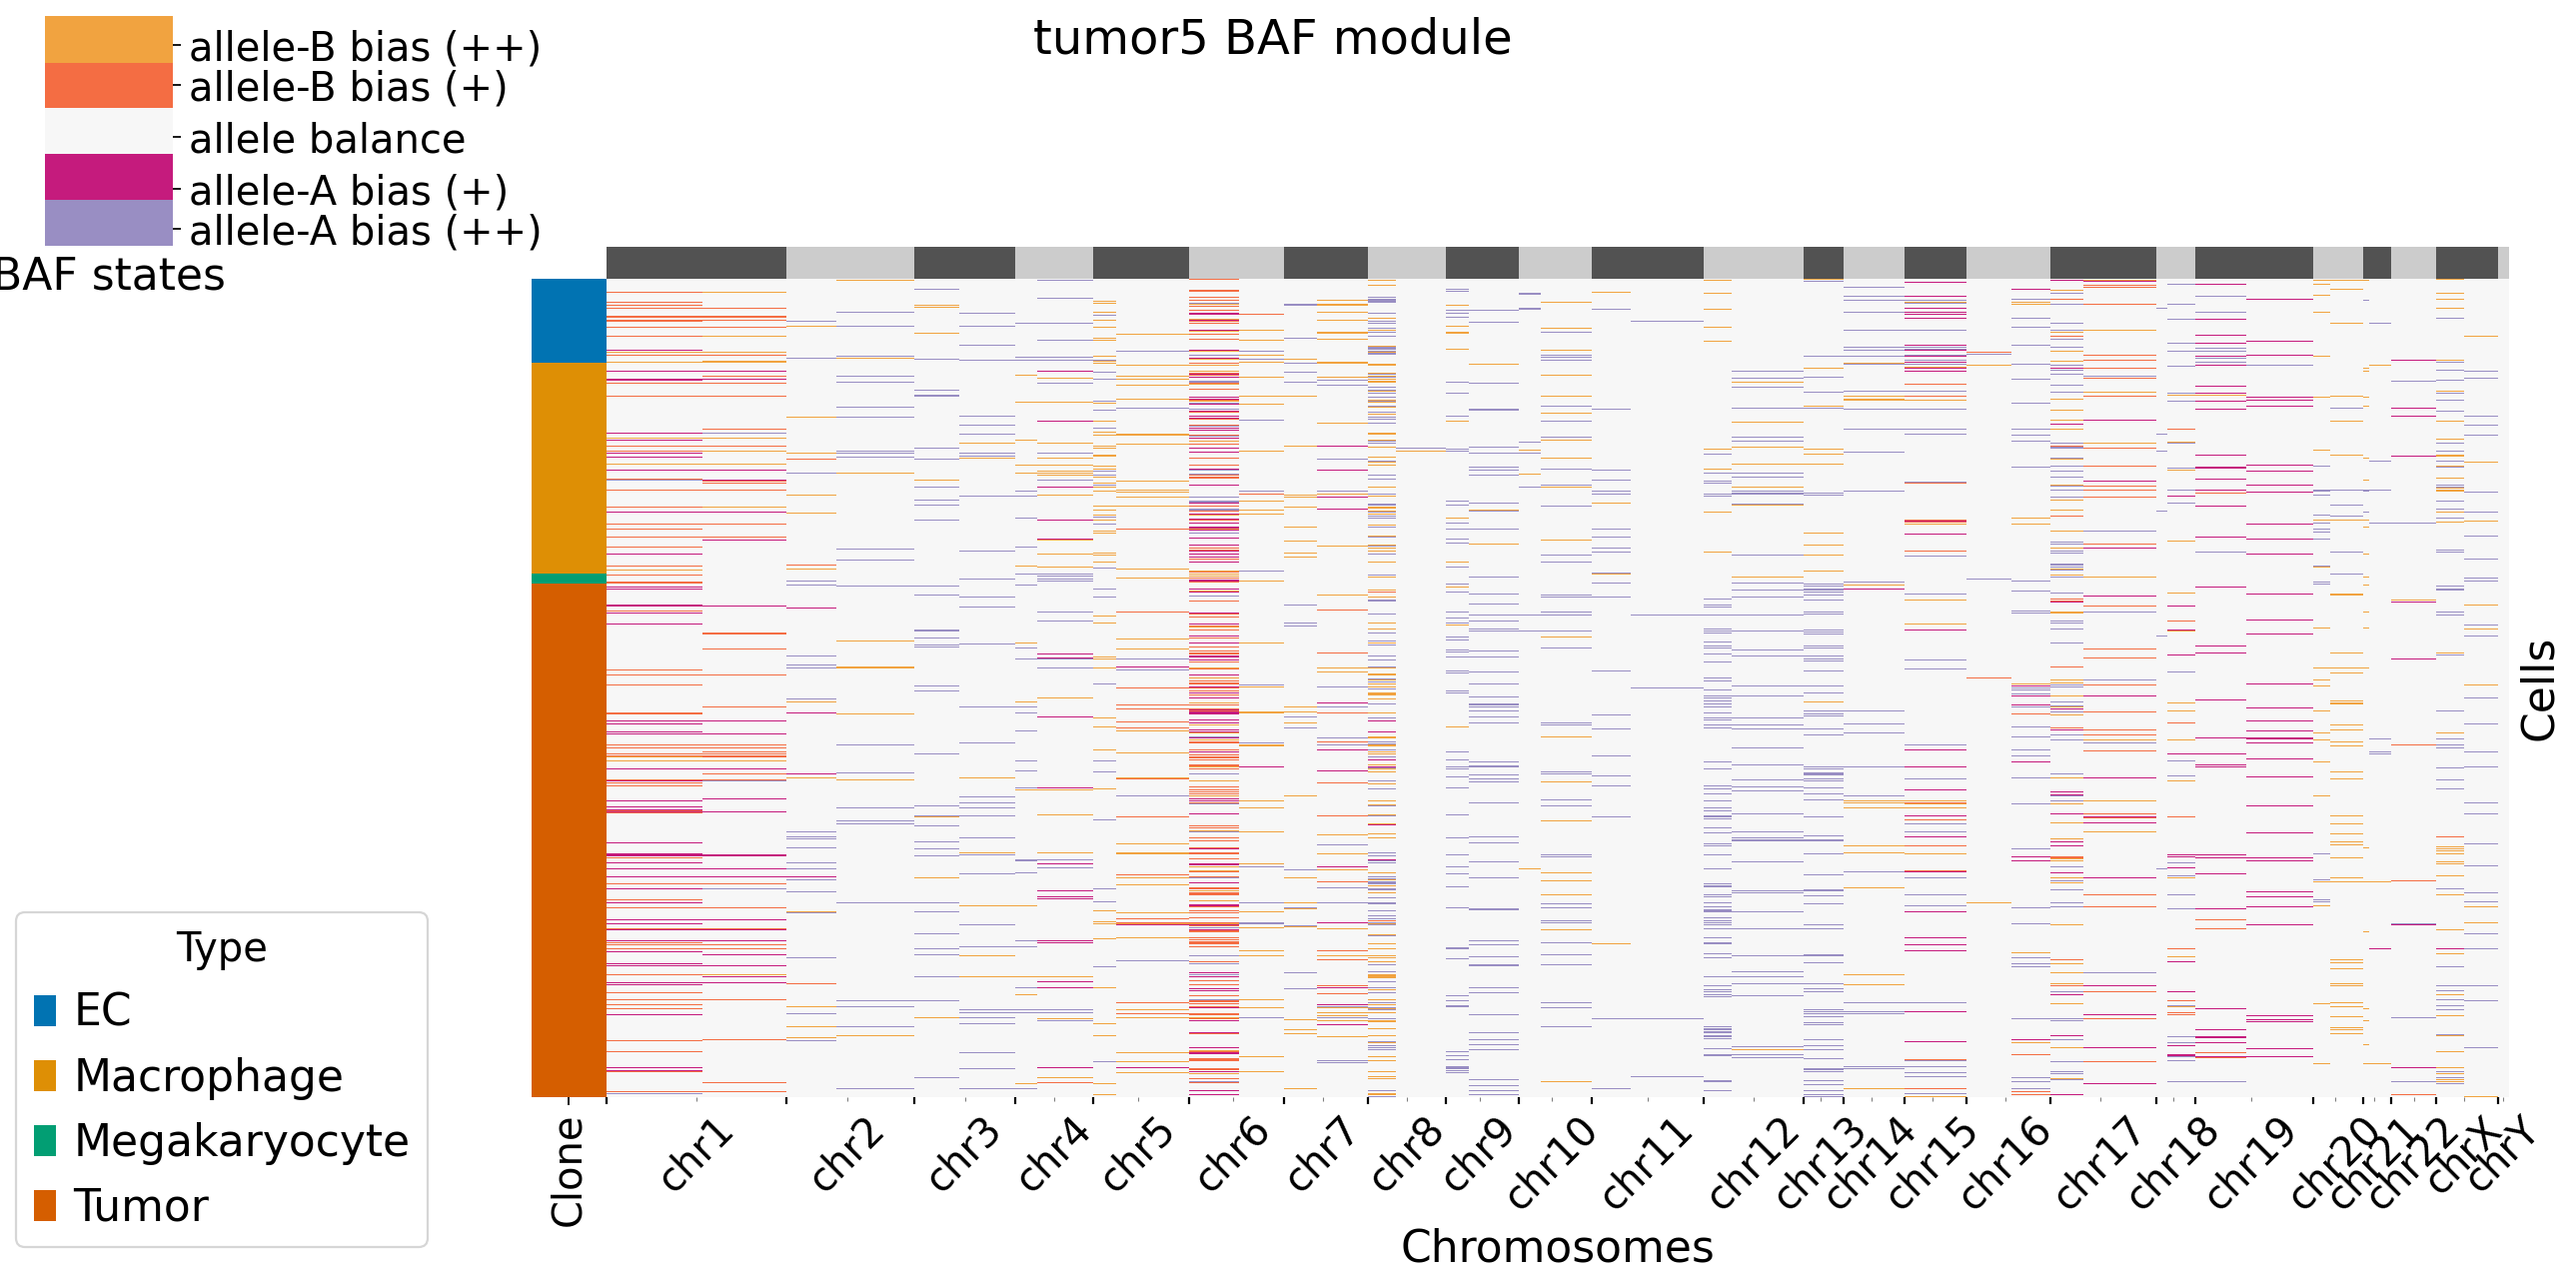

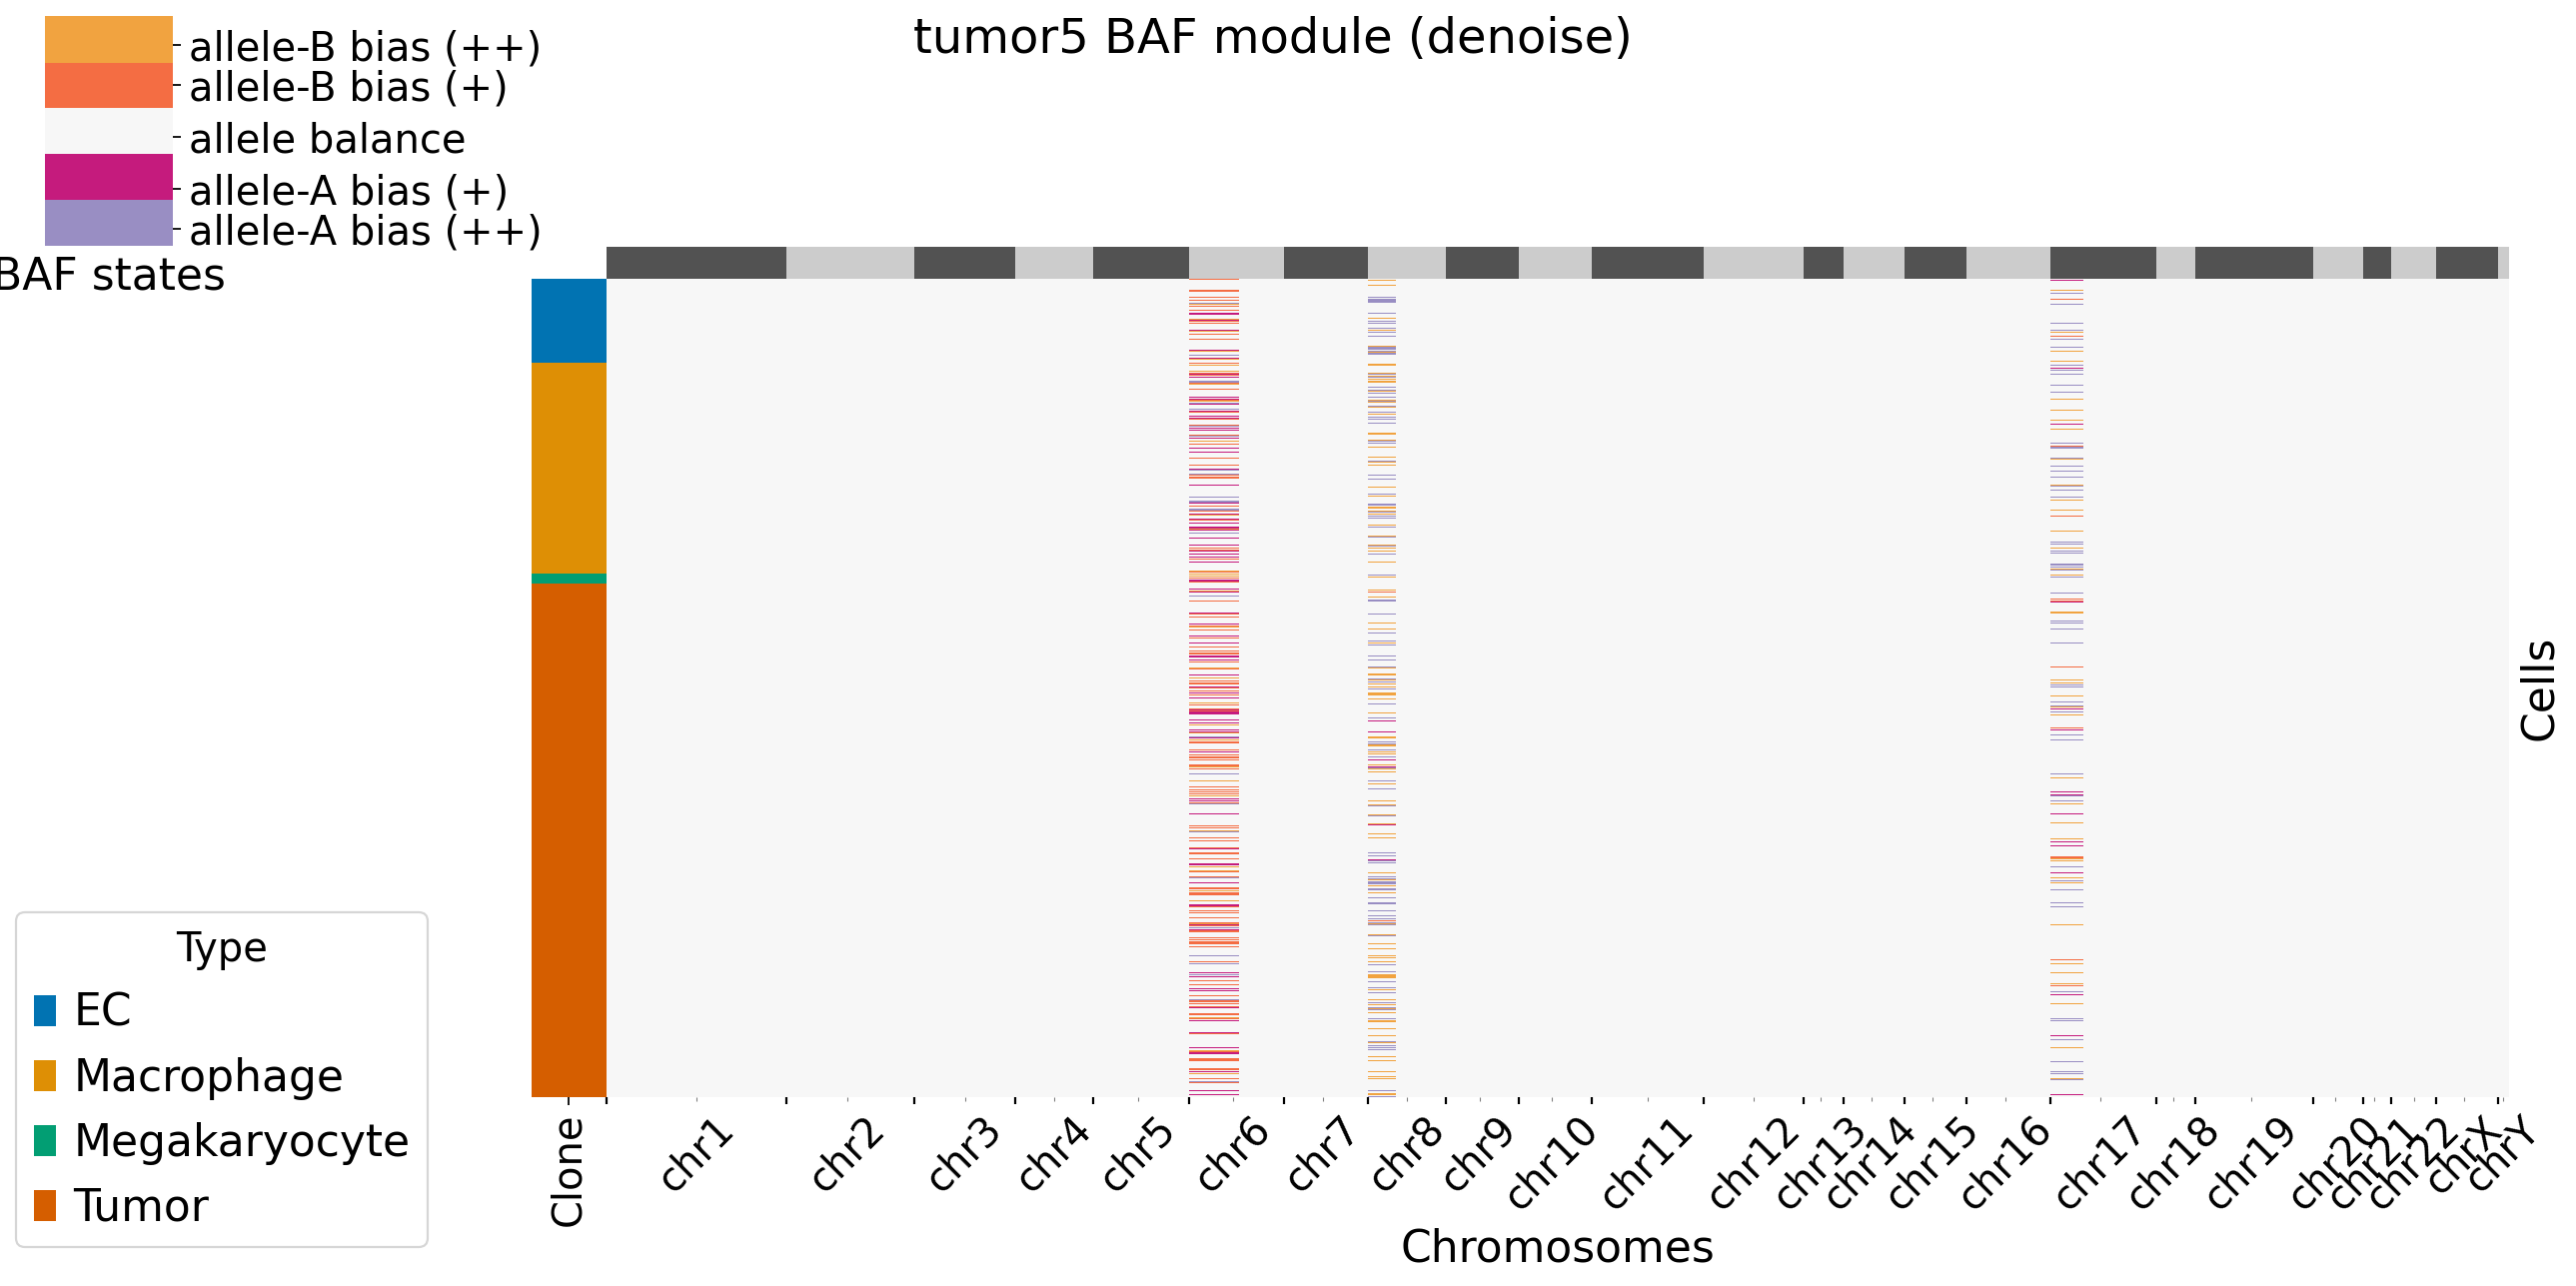

In [17]:
xconfig = xclone.XCloneConfig(dataset_name = "tumor5", module = "BAF", set_smartseq = False)
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = "/home/sc5625/xclone_files/tumor5_outputs/xclone5/baf5"
xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "N"
xconfig.filter_ref_ave = None

xconfig.concentration = 35.5
xconfig.concentration_lower = 20
xconfig.concentration_upper = 100
xconfig.theo_neutral_BAF = 0.5

xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "Type"
xconfig.remove_guide_XY = False
xconfig.phasing_region_key = "chr"
xconfig.phasing_len = 100

xconfig.WMA_window_size = 6

xconfig.trans_t = 1e-6
xconfig.start_prob = np.array([0.2, 0.15,  0.3, 0.15, 0.2])

t = xconfig.trans_t
xconfig.trans_prob = np.array([[1-4*t, t, t, t,t],[t, 1-4*t, t, t,t],[t, t, 1-4*t, t,t], [t, t, t, 1-4*t, t], [t, t, t, t, 1-4*t]])
xconfig.CNV_N_components = 5

xconfig.BAF_denoise = True
xconfig.RDR_file = "/home/sc5625/xclone_files/tumor5_outputs/xclone5/rdr5/data/RDR_adata_KNN_HMM_post.h5ad"
xconfig.display()

BAF_merge_Xdata = xclone.model.run_BAF(BAF_adata,
            config_file = xconfig)


Combine 
Configurations:
BAF_denoise                    True
KNN_neighbors                  10
KNN_npcs                       40
RDR_denoise                    False
RDR_prior                      True
WGD_cell_prop_threshold        50
WGD_detect_genome_level        chr_arm
WGD_detection                  True
WGD_prop_value_threshold       0.9
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /home/sc5625/xclone_files/xclone_tumor5_outputs/combine5
_plot_suffix                   
_start                         1750939112.2064974
_vector_friendly               True
cell_anno_key                  cell_type
copygain_correct               False
copygain_correct_mode          None
copyloss_correct               True
copyloss_correct_mode          1
customizedplotting             False
dataset_name                   tumor5
develop_mode                   False
exclude_XY                     False
file_form

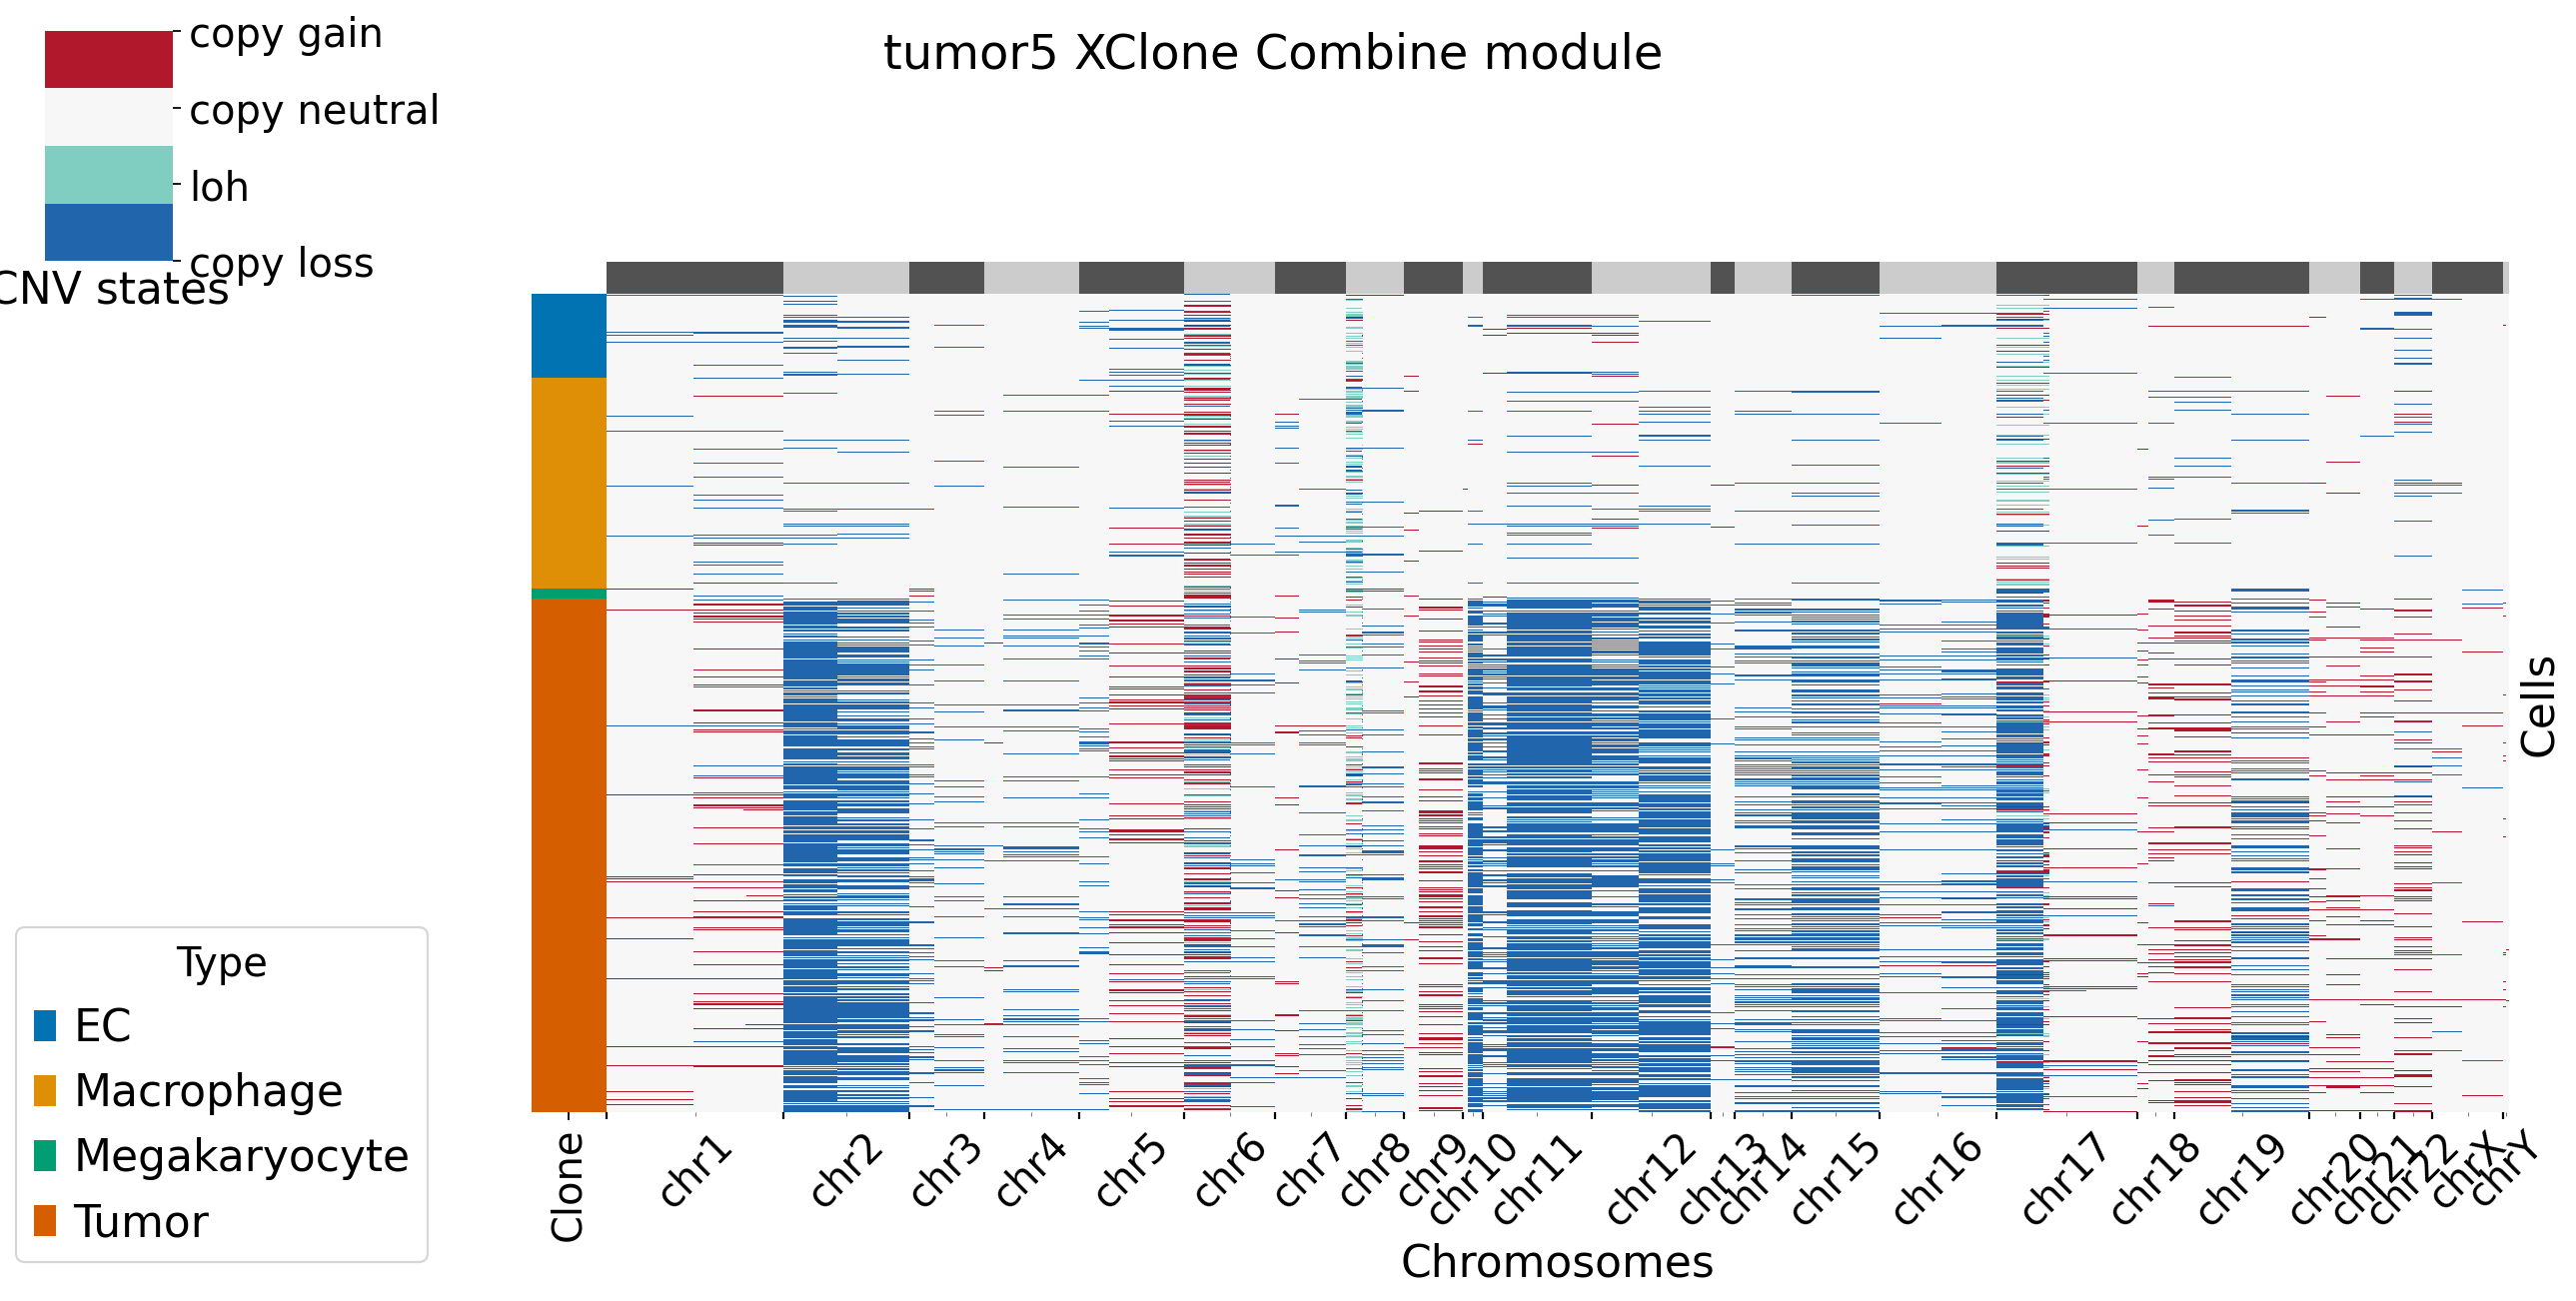

In [18]:
xconfig = xclone.XCloneConfig(dataset_name = "tumor5", module = "Combine")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = "/home/sc5625/xclone_files/xclone_tumor5_outputs/combine5"

xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "N"


xconfig.copygain_correct= False

xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "Type"
xconfig.merge_loss = False
xconfig.merge_loh = True

xconfig.BAF_denoise = True
xconfig.display()

combine_Xdata = xclone.model.run_combine(RDR_Xdata,
                BAF_merge_Xdata,
                verbose = True,
                run_verbose = True,
                config_file = xconfig)